# Import modules

In [1]:
import os
import fnmatch
from math import ceil

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
images, groups = {}, ["radial", "non-radial"]
for group in groups:
    images.update({group: []})
    img_dir = os.path.join("data/original", group)
    for path, sub_dirs, files in os.walk(img_dir):
        for file in fnmatch.filter(files, "*.png"):
            images[group].append(os.path.join(path, file))

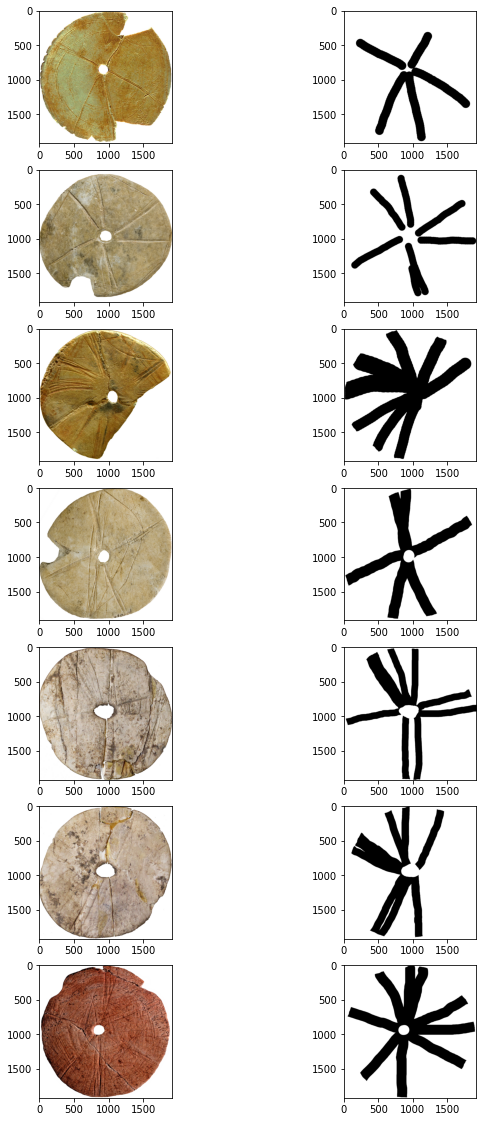

In [3]:
rows = int(len(images['radial'])*0.5)
fig, axs = plt.subplots(rows, 2, figsize=(10,20))
for idx, img_path in enumerate([i for i in images['radial'] if "_mask" not in i]):
    img_name = img_path.split("/")[-1].split(".")[0]
    img_mask_path = img_path.replace(img_name, img_name + "_mask")
    img = cv2.imread(img_path)
    preview_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_mask = cv2.imread(img_mask_path)
    if rows == 1:
        axs[0].imshow(preview_img)
        axs[1].imshow(img_mask)
    else:
        axs[idx, 0].imshow(preview_img)
        axs[idx, 1].imshow(img_mask)

In [4]:
x_break, y_break = 16, 16

radial_folder = "data/cropped/{0}x{0}/radial".format(x_break, y_break)
non_radial_folder = "data/cropped/{0}x{0}/non-radial".format(x_break, y_break)
if not os.path.exists(radial_folder): os.makedirs(radial_folder)
if not os.path.exists(non_radial_folder): os.makedirs(non_radial_folder)
for idx, img_path in enumerate([i for i in images['radial'] if "_mask" not in i]):
    print(img_path)
    img_name = img_path.split("/")[-1].split(".")[0]
    img_mask_path = img_path.replace(img_name, img_name + "_mask")
    img = cv2.imread(img_path)
    img_mask = cv2.imread(img_mask_path)
    preview_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, depth = img.shape
    s_height = ceil(height/y_break)
    s_width = ceil(width/x_break)
    for i in range(y_break):
        for j in range(x_break):
            temp = img[i*s_height:(i+1)*s_height, j*s_width:(j+1)*s_width]
            mask = img_mask[i*s_height:(i+1)*s_height, j*s_width:(j+1)*s_width]
            mask_pixels = len(np.where(mask == 0)[0])
            white_pix = len(np.where(temp == 255)[0])
            if mask_pixels > 0.2*temp.shape[0]*temp.shape[1]:
                if white_pix < 0.7*temp.shape[0]*temp.shape[1]:
                    cv2.imwrite("{0}/{1}_{2}_{3}.png".format(radial_folder, img_name, i, j), temp)
            else:
                if white_pix < 0.8*temp.shape[0]*temp.shape[1]:
                    cv2.imwrite("{0}/{1}_{2}_{3}.png".format(non_radial_folder,img_name, i, j), temp)
                    
for idx, img_path in enumerate(images['non-radial']):
    print(img_path)
    img_name = img_path.split("/")[-1].split(".")[0]
    img = cv2.imread(img_path)
    preview_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, depth = img.shape
    s_height = ceil(height/y_break)
    s_width = ceil(width/x_break)
    for i in range(y_break):
        for j in range(x_break):
            temp = img[i*s_height:(i+1)*s_height, j*s_width:(j+1)*s_width]
            white_pix = len(np.where(temp == 255)[0])
            if white_pix < 0.7*temp.shape[0]*temp.shape[1]:
                cv2.imwrite("{0}/{1}_{2}_{3}.png".format(non_radial_folder, img_name, i, j), temp)

data/original/radial/10.png
data/original/radial/11.png
data/original/radial/12.png
data/original/radial/13.png
data/original/radial/14.png
data/original/radial/15.png
data/original/radial/16.png
data/original/non-radial/1.png
data/original/non-radial/2.png
data/original/non-radial/3.png
data/original/non-radial/4.png
data/original/non-radial/5.png
data/original/non-radial/6.png
data/original/non-radial/7.png
data/original/non-radial/8.png
data/original/non-radial/9.png
